学习R语言分位数回归。

In [9]:
library(quantreg) # 载入quantreg包
data(engel)  # 加载quantreg包自带的数据集engel
View(engel)  # 查看数据集

Loading required package: SparseM



,income,foodexp
,<dbl>,<dbl>
1,420.1577,255.8394
2,541.4117,310.9587
3,901.1575,485.6800
4,639.0802,402.9974
5,750.8756,495.5608
6,945.7989,633.7978
7,829.3979,630.7566
8,979.1648,700.4409
9,1309.8789,830.9586


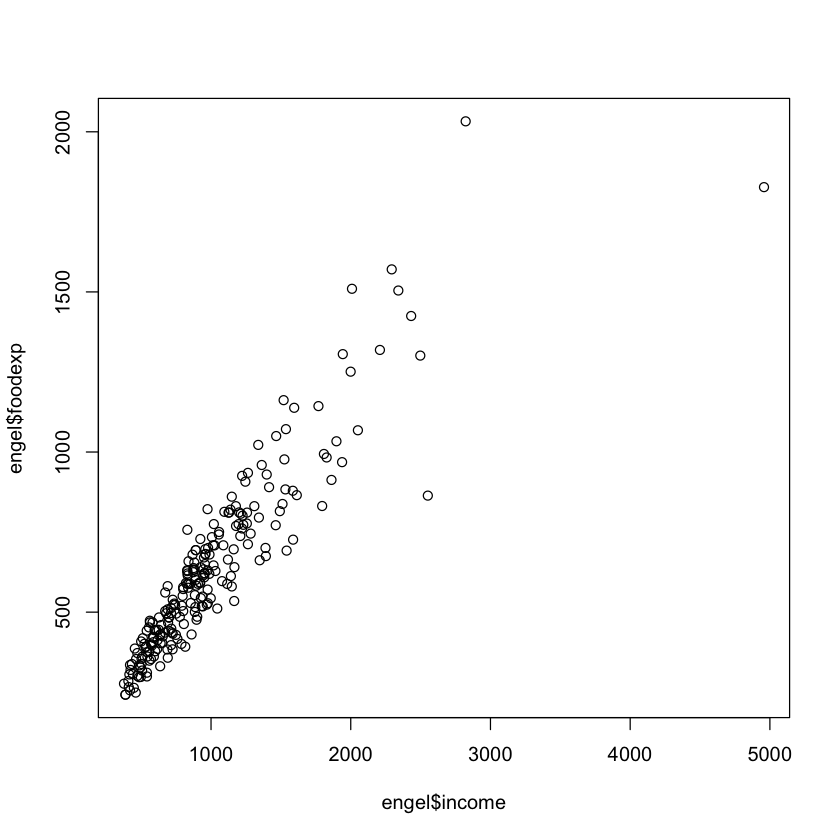

In [10]:
plot(engel$income,engel$foodexp)

In [13]:
install.packages("ggfortify")  # 安装ggfortify包


The downloaded binary packages are in
	/var/folders/fv/c0dh9y6s7638rh5fdr3lgcmr0000gn/T//Rtmp39AdsP/downloaded_packages


Loading required package: ggplot2



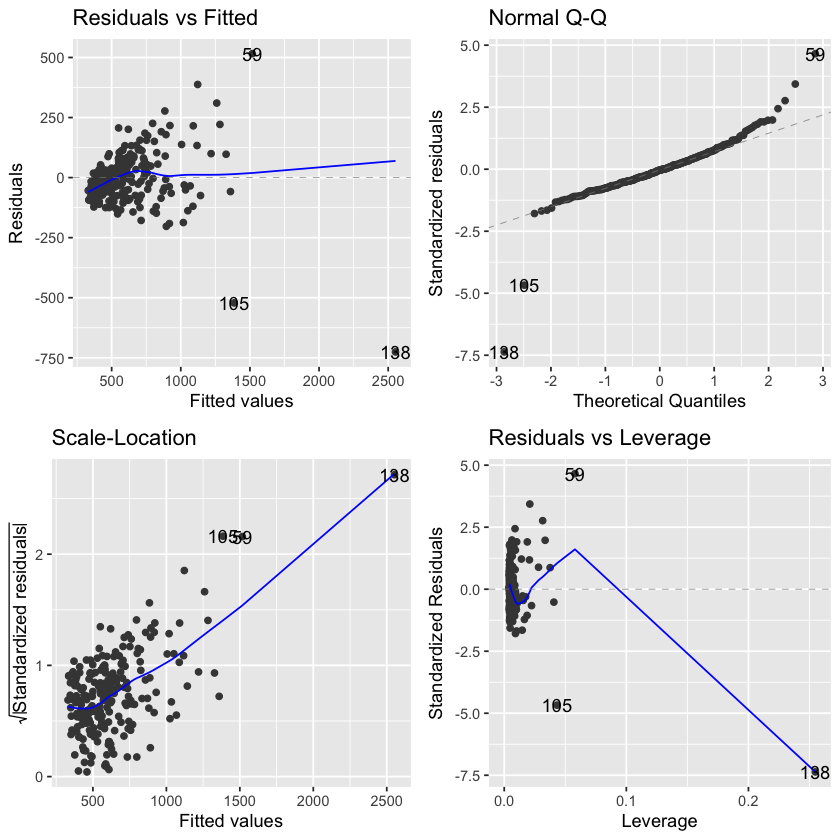

In [14]:
# 使用ggfortify包进行可视化展示
library(ggfortify)

# 拟合线性回归模型
fit<-lm(foodexp ~ income,data=engel)

# 使用autoplot函数进行回归诊断的可视化展示
autoplot(fit)

In [16]:
install.packages("quantreg")


The downloaded binary packages are in
	/var/folders/fv/c0dh9y6s7638rh5fdr3lgcmr0000gn/T//Rtmp39AdsP/downloaded_packages


In [17]:
#分位数回归，选取不同的分位数，用函数tau表示。这里选取了第25、50和75百分位数，拟合了三个模型。(tau = 0.25、0.5、0.75)
fit1 = rq(foodexp ~ income, tau = 0.25, data = engel)
fit2 = rq(foodexp ~ income, tau = 0.5, data = engel)
fit3 = rq(foodexp ~ income, tau = 0.75, data = engel)

In [18]:
summary(fit1)


Call: rq(formula = foodexp ~ income, tau = 0.25, data = engel)

tau: [1] 0.25

Coefficients:
            coefficients lower bd  upper bd 
(Intercept)  95.48354     73.78608 120.09847
income        0.47410      0.42033   0.49433

In [28]:
summary(fit1, se = "boot")


Call: rq(formula = foodexp ~ income, tau = 0.25, data = engel)

tau: [1] 0.25

Coefficients:
            Value    Std. Error t value  Pr(>|t|)
(Intercept) 95.48354 27.86632    3.42649  0.00072
income       0.47410  0.03679   12.88786  0.00000

In [19]:
anova(fit1,fit2,fit3) 

Quantile Regression Analysis of Deviance Table

Model: foodexp ~ income
Joint Test of Equality of Slopes: tau in {  0.25 0.5 0.75  }

  Df Resid Df F value    Pr(>F)    
1  2      703  15.557 2.449e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

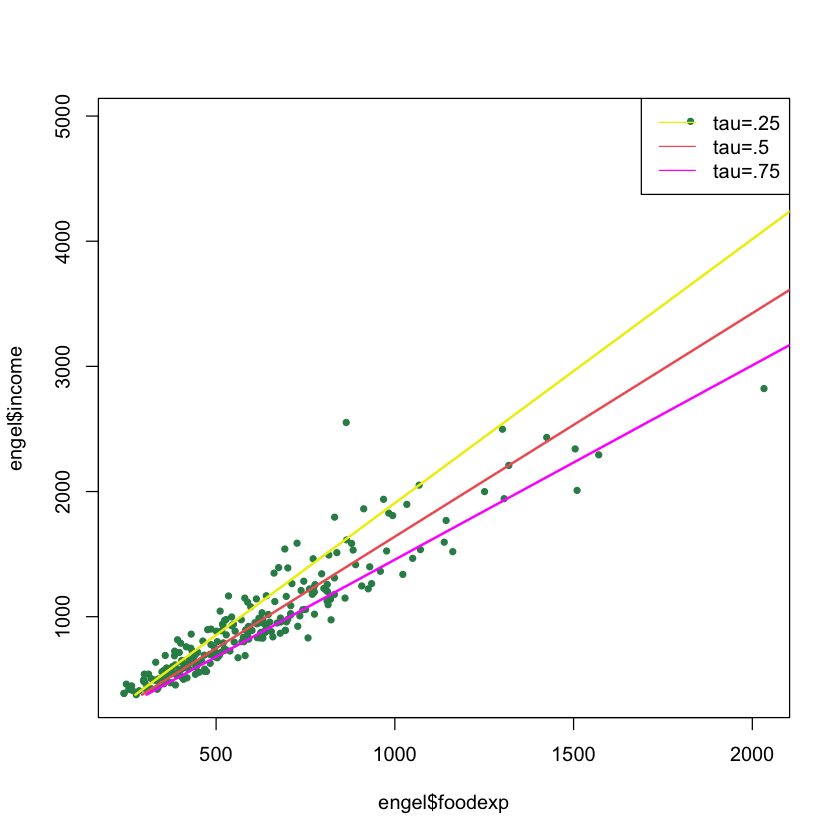

In [20]:
plot(engel$foodexp, engel$income, pch=20, col = '#2E8B57')
lines(fitted(fit1), engel$income, lwd=2, col = '#EEEE00')
lines(fitted(fit2), engel$income, lwd=2, col = '#EE6363')
lines(fitted(fit3), engel$income, lwd=2, col = '#FF00FF')
legend("topright", c("tau=.25","tau=.5","tau=.75"), lty=c(1,1,1), col=c('#EEEE00','#EE6363','#FF00FF'))

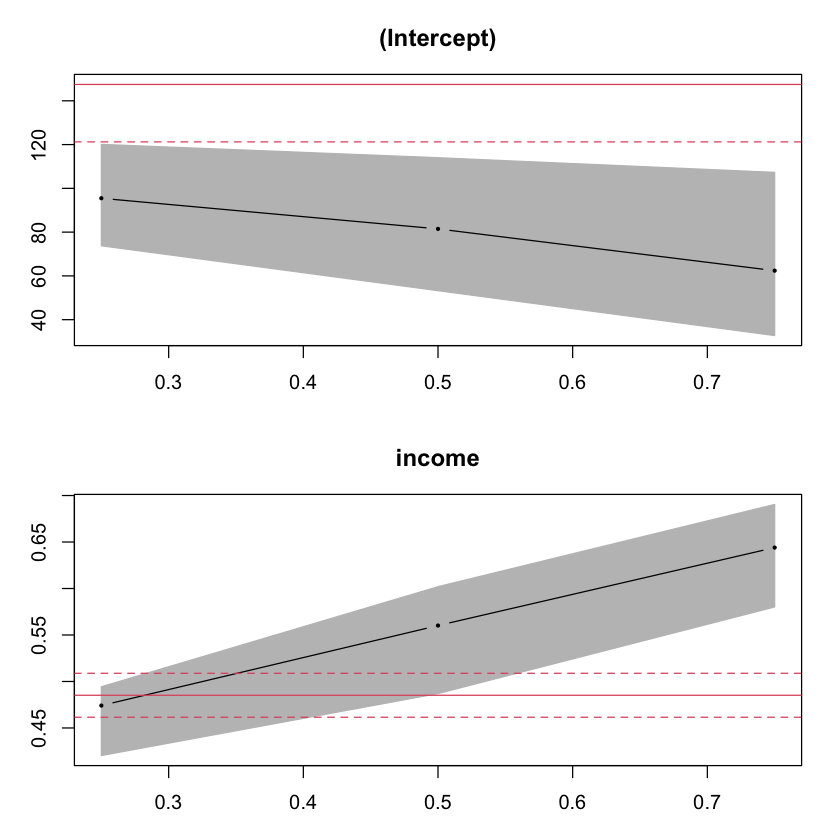

In [21]:
fit = rq(foodexp ~ income,  tau = c(0.25,0.5,0.75), data = engel)
plot(summary(fit))